In [5]:
# Imports
import numpy as np
from pathlib import Path
import importlib 
import massimal.pipeline
import matplotlib.pyplot as plt

In [2]:
dataset_dir = Path('/media/mha114/Massimal2/seabee-minio/smola/skalmen/aerial/hsi/20230620/massimal_smola_skalmen_202306201815-se_hsi')

In [8]:
importlib.reload(massimal.pipeline)
pl = massimal.pipeline.PipelineProcessor(dataset_dir)


09:35:36 INFO: File logging initialized.


In [9]:
reflectance_processor = massimal.pipeline.ReflectanceConverter(irrad_spec_paths=pl.irrad_spec_paths)

In [19]:
ind_550 = massimal.pipeline.closest_wl_index(reflectance_processor.ref_irrad_spec_wl,550)
print(ind_550)
ind_745 = massimal.pipeline.closest_wl_index(reflectance_processor.ref_irrad_spec_wl,745)
print(ind_745)

578
1152


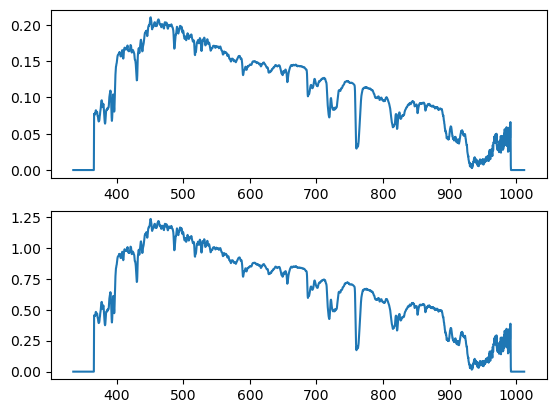

In [21]:
fig,ax = plt.subplots(nrows=2)
ax[0].plot(reflectance_processor.ref_irrad_spec_wl, reflectance_processor.ref_irrad_spec_mean)
mean_spec_norm = reflectance_processor.ref_irrad_spec_mean / reflectance_processor.ref_irrad_spec_mean[ind_550]
ax[1].plot(reflectance_processor.ref_irrad_spec_wl,mean_spec_norm)

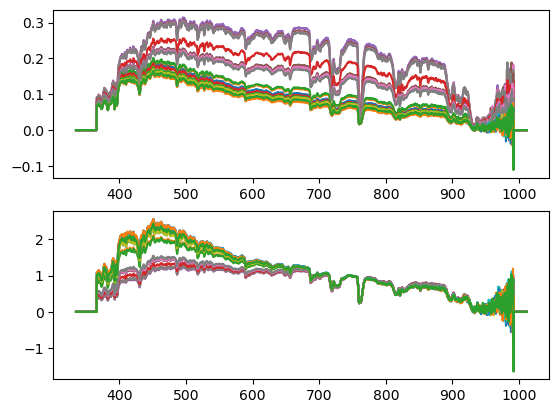

In [20]:
fig,ax = plt.subplots(nrows=2)
for spec in reflectance_processor.ref_irrad_spectra:
    ax[0].plot(reflectance_processor.ref_irrad_spec_wl,spec)    
    norm_spec = spec/spec[ind_745]
    ax[1].plot(reflectance_processor.ref_irrad_spec_wl,norm_spec)